In [14]:
import pandas as pd
import geopandas as gpd
import matplotlib.pyplot as plt
import numpy as np
from matplotlib_scalebar.scalebar import ScaleBar 
import re

In [30]:
# Load the shapefile
file_path = 'Data/Raw/Geography/MSOA/england_msoa_2021.shp'
gdf = gpd.read_file(file_path)


# Define the list of areas to keep
areas_to_keep = [
    'City of London', 'Barking and Dagenham', 'Barnet', 'Bexley', 'Brent', 'Bromley',
    'Camden', 'Croydon', 'Ealing', 'Enfield', 'Greenwich', 'Hackney', 'Hammersmith and Fulham',
    'Haringey', 'Harrow', 'Havering', 'Hillingdon', 'Hounslow', 'Islington', 'Kensington and Chelsea',
    'Kingston upon Thames', 'Lambeth', 'Lewisham', 'Merton', 'Newham', 'Redbridge', 'Richmond upon Thames',
    'Southwark', 'Sutton', 'Tower Hamlets', 'Waltham Forest', 'Wandsworth', 'Westminster'
]

# Create a regex pattern for exact matches
pattern = r'\b(?:' + '|'.join(re.escape(area) for area in areas_to_keep) + r')\b'

# Filter the dataframe using the regex pattern
filtered_gdf = gdf[gdf['msoa21nm'].str.contains(pattern, regex=True, na=False)]

# Convert to WGS84 coordinate system (latitude and longitude)
filtered_gdf = filtered_gdf.to_crs(epsg=4326)

# Save the filtered dataframe to a new shapefile
filtered_gdf.to_file('Data/Revised/Geography/MSOA/London.shp')

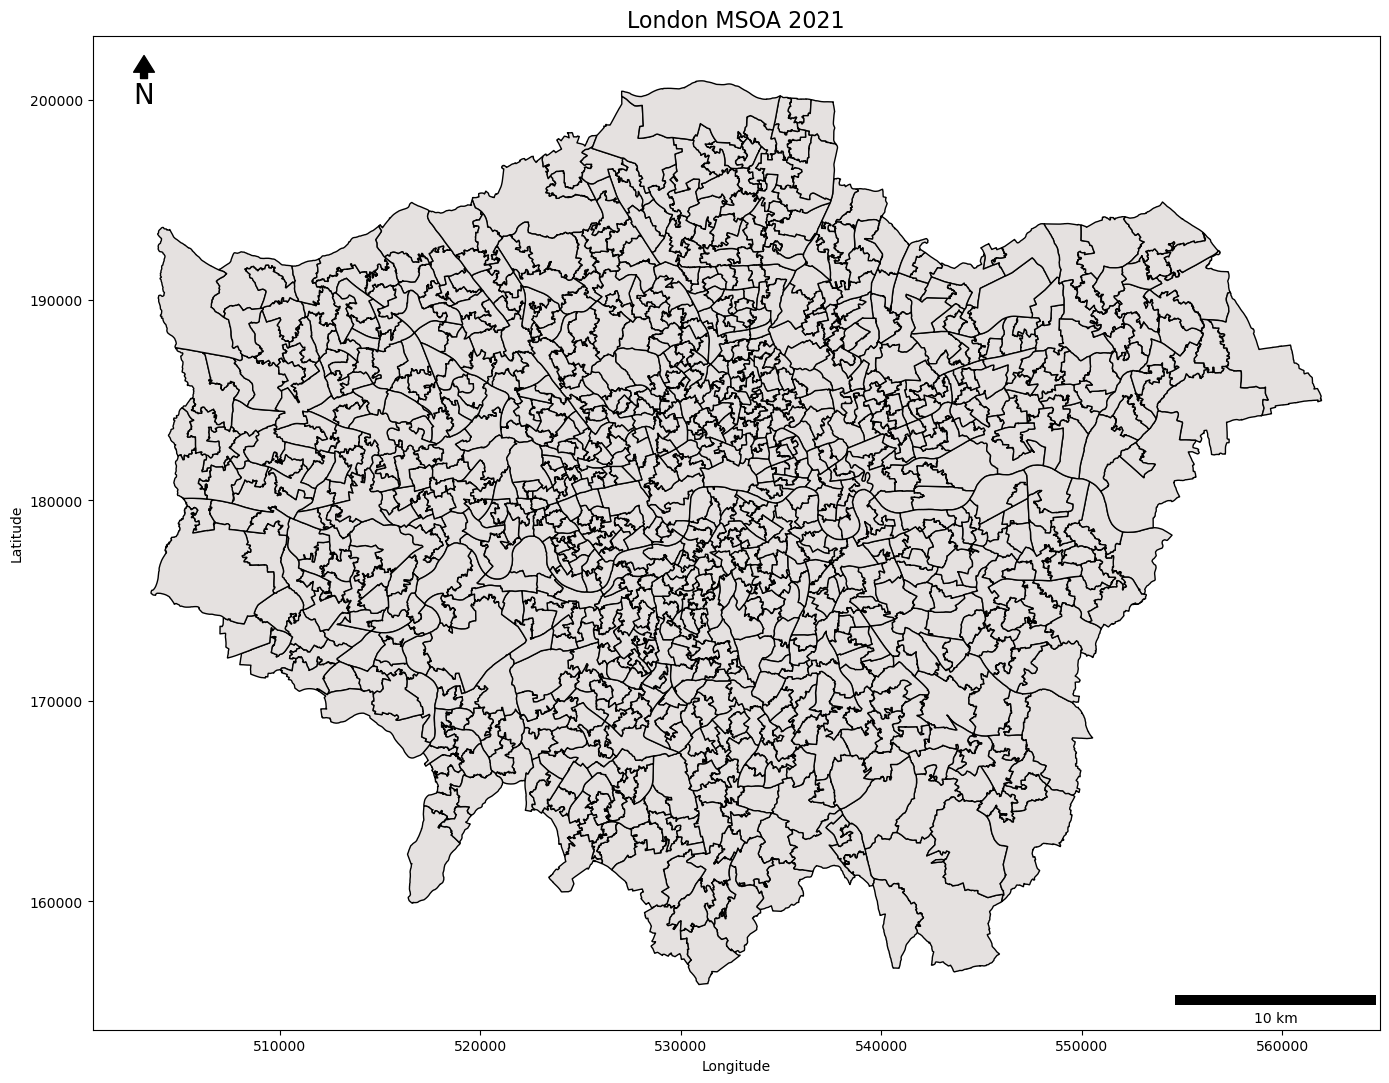

In [32]:
shapefile_path = "Data/Revised/Geography/MSOA/London_2021.shp"
gdf_2021 = gpd.read_file(shapefile_path)

# Plot the filtered GeoDataFrame
fig, ax = plt.subplots(1, 1, figsize=(14, 12))
gdf_2021.plot(ax=ax, edgecolor='black', color='#e5e1e0')

# Add North arrow
x, y, arrow_length = 0.04, 0.98, 0.04
ax.annotate('N', xy=(x, y), xytext=(x, y - arrow_length),
            arrowprops=dict(facecolor='black', width=5, headwidth=15),
            ha='center', va='center', fontsize=20, xycoords='axes fraction', zorder=5)

# Add scale bar with units in meters and set the background to transparent
scalebar = ScaleBar(dx=1, units="m", location='lower right', scale_loc='bottom', length_fraction=0.2, box_alpha=0)
ax.add_artist(scalebar)

# Add title and turn off axis
ax.set_title('London MSOA 2021', fontsize=16)

# Adjust layout to ensure everything fits well
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.tight_layout()

# Save the figure as an image
output_path = "Data/Study Area.png"
plt.savefig(output_path, dpi=300, bbox_inches='tight', transparent=True)

plt.show()